In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from collections import Counter
#import tqdm
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

Welcome to JupyROOT 6.28/00


In [4]:
date = "JUN13"

chainSGN = ROOT.TChain("events")
#chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1040_GFcat_Phi3Cat_2018.root".format(date))
chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1041_GFcat_D0StarCat_2018.root".format(date))

df = ROOT.RDataFrame(chainSGN)

df = df.Define("GenPT", "getPTParticleMotherGrandMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_pt, 421, 423, 25)[0]")\
    .Define("GenPhi", "getPhiEtaParticleMotherGrandMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_phi, GenPart_eta, 421, 423, 25)[0]")\
    .Define("GenEta", "getPhiEtaParticleMotherGrandMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_phi, GenPart_eta, 421, 423, 25)[1]")\
    .Define("size", "goodMeson_pt.size()")

'''
df = df.Define("GenPT", "getPTParticleMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_pt, 333, 25)[0]")\
    .Define("GenPhi", "getPhiEtaParticleMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_phi, GenPart_eta, 333, 25)[0]")\
    .Define("GenEta", "getPhiEtaParticleMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_phi, GenPart_eta, 333, 25)[1]")\
    .Define("size", "goodMeson_pt.size()")
'''

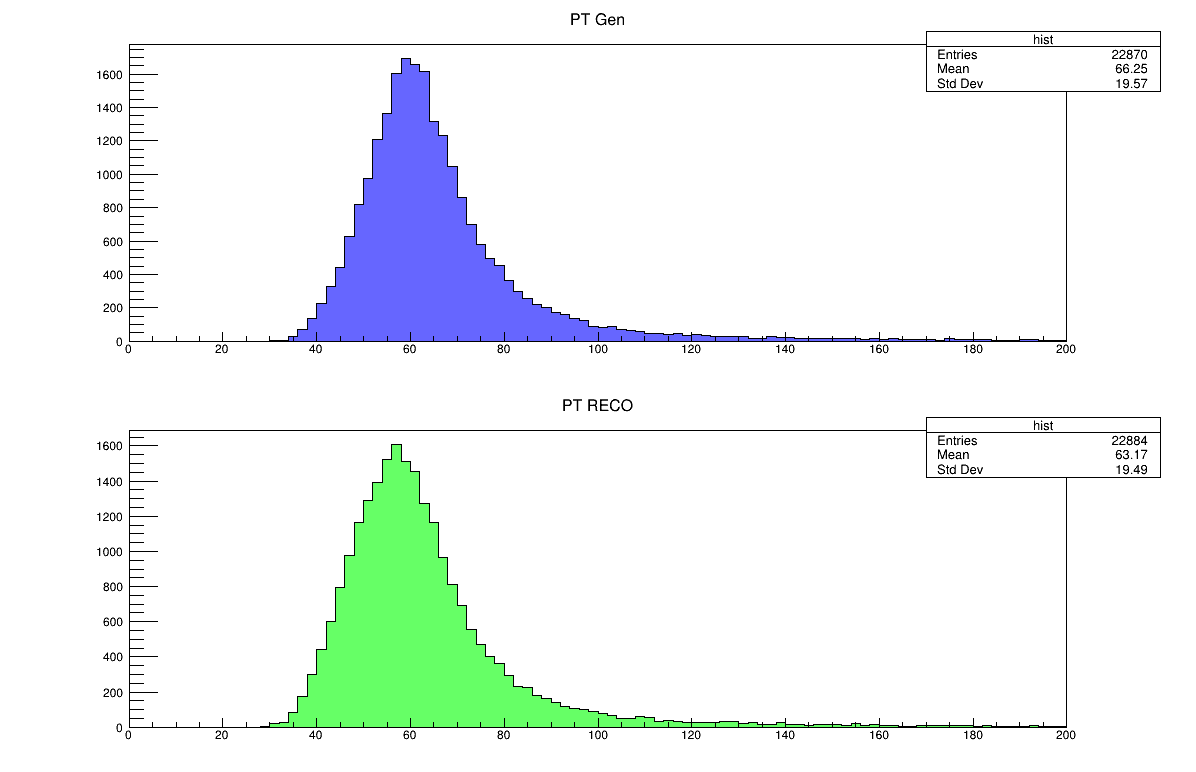

In [5]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 800)

canvas.Divide(1, 2)

bins, xlow, xhigh = 100, 0, 200

hgen=df.Filter("size > 0").Histo1D(("hist", "PT Gen", bins, xlow, xhigh),"GenPT")

hreco=df.Filter("size > 0").Histo1D(("hist", "PT RECO", bins, xlow, xhigh),"goodMeson_pt")



hgen.SetFillColor(ROOT.kBlue-7)
hgen.SetLineColor(ROOT.kBlack)
hreco.SetFillColor(ROOT.kGreen-7)
hreco.SetLineColor(ROOT.kBlack)

canvas.cd(1)
hgen.Draw("hist")
canvas.cd(2)
hreco.Draw("hist")

'''
stack = ROOT.THStack("stack", "H cand mass for phi, reconstruction")
stack.Add(hgood.GetValue())
stack.Add(hbad.GetValue())
stack.Draw("hist nostack")
#stack.GetXaxis().SetTitle("p_{T}_{2trk}^{#phi#rightarrow #pi#pi} [GeV]")
stack.GetYaxis().SetTitle("Frequency")

legend = ROOT.TLegend(0.15, 0.65, 0.3, 0.89)
legend.SetMargin(0.17)
legend.SetBorderSize(0)
legend.SetTextSize(0.04)
legend.AddEntry(hbad.GetValue(), "#splitline{{Rejected (mean: {:.1f} GeV)}}{{# entries: {:.0f}}}".format(round(hbad.GetMean(), 1), round(hbad.GetEntries(), 0)), "f")
legend.AddEntry(hgood.GetValue(), "#splitline{{Accepted (mean: {:.1f} GeV)}}{{# entries: {:.0f}}}".format(round(hgood.GetMean(), 1), round(hgood.GetEntries(), 0)), "f")
legend.Draw()
'''


canvas.Draw()


In [6]:
dfnew = df.Filter("size  > 1")#.Define("goodMesonImproved", "getFilteredGoodMeson(goodMeson, goodMeson_pt, goodMeson_vtx_prob)")


colsDiff = ["goodMeson", "goodMeson_pt", "goodMeson_eta", "goodMeson_phi", "goodMeson_iso", "goodMeson_mass",\
    "goodMeson_vtx_chi2dof", "goodMeson_vtx_prob", "goodMeson_sipPV", "goodMeson_bestVtx_X",\
           "goodMeson_bestVtx_Y", "goodMeson_bestVtx_Z", "goodMeson_trk1_pt", "goodMeson_trk2_pt",\
           "goodMeson_leadtrk_pt", "goodMeson_subleadtrk_pt", "goodMeson_threemass"]

colsDiff = ["goodMeson_pt", "goodMeson_phi", "goodMeson_eta", "goodMeson_vtx_prob"]

cols = ["GenPT", "GenPhi", "GenEta"] + colsDiff

x = dfnew.AsNumpy(columns=cols)

#print(df.AsNumpy(columns=cols)["mc"][0])

pddf = pd.DataFrame(x)

display(pddf)
#print(set(pddf["mc"]))

,GenPT,GenPhi,GenEta,goodMeson_pt,goodMeson_phi,goodMeson_eta,goodMeson_vtx_prob
0,129.500,2.945312,-1.726562,"[93.2633056640625, 98.87261962890625]","[2.946687936782837, 2.9462978839874268]","[-1.7265818119049072, -1.7300467491149902]","[0.08994290232658386, 0.06364721059799194]"
1,87.250,-2.062500,-0.291016,"[35.381256103515625, 81.76174926757812]","[1.6384098529815674, -2.058234930038452]","[2.232002019882202, -0.291217565536499]","[0.9881274700164795, 0.6865460276603699]"
2,67.250,2.921875,-0.550781,"[57.93183135986328, 58.99408721923828]","[2.917940139770508, 2.9183504581451416]","[-0.5491429567337036, -0.5491880774497986]","[0.6777745485305786, 0.0022959383204579353]"
3,64.250,0.117920,-1.535156,"[44.27613067626953, 46.38811492919922]","[0.1256687045097351, 0.11150436848402023]","[-1.532227635383606, -1.5371702909469604]","[0.8971648812294006, 0.0656503438949585]"
4,58.875,-0.415039,-0.342773,"[41.376617431640625, 43.27302551269531]","[-0.40600839257240295, -0.4026147425174713]","[-0.3450791835784912, -0.3380817472934723]","[0.8933829069137573, 0.7504865527153015]"
5,61.875,3.093750,0.802734,"[63.306880950927734, 47.427955627441406]","[3.0942535400390625, 3.10075306892395]","[0.8078005909919739, 0.7991973757743835]","[0.5503227710723877, 0.46946486830711365]"
6,130.000,1.886719,0.771484,"[111.01309967041016, 170.20123291015625]","[1.8865792751312256, -1.370783805847168]","[0.7703258991241455, -0.9646561145782471]","[0.32656705379486084, 0.3624761998653412]"
7,82.500,-0.574219,-1.839844,"[43.5543327331543, 48.06419372558594]","[2.882648229598999, 2.869612216949463]","[-1.3442732095718384, -1.3528289794921875]","[0.9657291173934937, 0.8655907511711121]"
8,179.000,-0.677734,-0.605469,"[66.7115249633789, 176.38914489746094]","[-2.9088265895843506, -0.6766034960746765]","[2.019028663635254, -0.6058221459388733]","[0.1377420723438263, 0.9984897971153259]"
9,65.500,1.585938,-1.191406,"[50.30351257324219, 57.79658889770508]","[1.5865192413330078, 1.588993787765503]","[-1.17843759059906, -1.1885310411453247]","[0.28252995014190674, 0.8037798404693604]"


In [19]:
display(pddf[10450:10460])

,D0GenPT,D0GenPhi,D0GenEta,goodMeson,goodMesonImproved,goodMeson_pt,goodMeson_vtx_prob
10450,56.000,2.281250,0.673828,"[1, 1, 0, 0]","[1, 0, 0, 0]","[56.7945442199707, 56.7945442199707]","[0.7110745906829834, 0.7110745906829834]"
10451,55.875,-1.156250,1.261719,"[1, 1]","[1, 0]","[55.18783950805664, 55.18783950805664]","[0.06704394519329071, 0.06704394519329071]"
10452,47.625,1.742188,-1.027344,"[1, 1]","[1, 0]","[48.028846740722656, 48.028846740722656]","[0.6654248237609863, 0.6654248237609863]"
10453,59.375,-1.156250,-2.085938,"[0, 0, 1, 1, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0]","[60.0312614440918, 60.0312614440918]","[0.9583176374435425, 0.9583176374435425]"
10454,71.750,2.382812,0.460938,"[0, 1, 1, 0]","[0, 1, 0, 0]","[71.51722717285156, 71.51722717285156]","[0.053725164383649826, 0.053725164383649826]"
10455,52.250,-1.109375,1.457031,"[1, 1, 0, 0]","[1, 0, 0, 0]","[51.5467529296875, 51.5467529296875]","[0.6726925373077393, 0.6726925373077393]"
10456,97.000,0.617188,-1.867188,"[0, 0, 0, 1, 1, 0]","[0, 0, 0, 1, 1, 0]","[55.333229064941406, 96.71788024902344]","[0.2174961119890213, 0.009118194691836834]"
10457,51.625,-2.218750,-0.771484,"[1, 1]","[1, 0]","[50.6077995300293, 50.6077995300293]","[0.22526799142360687, 0.22526799142360687]"
10458,53.250,-2.710938,-1.449219,"[1, 1]","[1, 0]","[53.03000259399414, 53.03000259399414]","[0.8131723999977112, 0.8131723999977112]"
10459,52.000,-0.886719,-1.679688,"[1, 1, 0, 0]","[1, 0, 0, 0]","[52.196739196777344, 52.196739196777344]","[0.48134833574295044, 0.48134833574295044]"


In [17]:
colsDiff = ["goodMeson_pt"]
differences = {}
for colname in colsDiff:
    differences[colname] = []

for colname in colsDiff:
    print(colname)
    tol = 1e-4
    for i in range(len(pddf[colname])):
        v = pddf[colname][i]
        vnp = np.asarray([v[j] for j in range(len(v))])
        mn = np.mean(vnp)
        st = np.std(vnp)
        reldif = abs(st/mn)

        if (reldif > tol):
            print("[{}]".format(i), v, vnp, st, reldif)
        else:
            differences[colname].append(reldif)


goodMeson_pt
[10456] { 55.3332f, 96.7179f } [55.33322906 96.71788025] 20.692325592041016 0.2721759240745055
[12318] { 113.775f, 115.673f } [113.77497864 115.67302704] 0.9490242004394531 0.008272237517535374


In [6]:
colsDiff = ["goodMeson_pt", "goodMeson_iso", "goodMeson_vtx_prob", "goodMeson_trk1_pt", "goodMeson_trk2_pt"]
differences = {}
for colname in colsDiff:
    differences[colname] = []


for i in range(len(pddf[colsDiff[0]]))[:10]:
    for colname in colsDiff:
        #print(colname)

        tol = 1.5e-4

        v = pddf[colname][i]
        vnp = np.asarray([v[j] for j in range(len(v))])
        mn = np.mean(vnp)
        st = np.std(vnp)
        reldif = abs(st/mn)

        print("[{}-{}]".format(i, colname), vnp, round(st, 3), round(reldif, 3))

    print("")


[0-goodMeson_pt] [109.96859741 203.17962646 203.17962646] 43.94 0.255
[0-goodMeson_iso] [0.95255852 1.         1.        ] 0.022 0.023
[0-goodMeson_vtx_prob] [0.1037515  0.66360784 0.66360784] 0.264 0.553
[0-goodMeson_trk1_pt] [ 94.1875 101.875  101.3125] 3.499 0.035
[0-goodMeson_trk2_pt] [ 15.78125 101.3125  101.875  ] 40.453 0.554

[1-goodMeson_pt] [117.61589813  49.03239441  49.03239441] 32.331 0.45
[1-goodMeson_iso] [1. 1. 1.] 0.0 0.0
[1-goodMeson_vtx_prob] [0.08696321 0.88804549 0.88804549] 0.378 0.608
[1-goodMeson_trk1_pt] [36.9375  31.78125 17.28125] 8.321 0.29
[1-goodMeson_trk2_pt] [80.6875  17.28125 31.78125] 27.126 0.627

[2-goodMeson_pt] [67.60411072 52.23115158 52.23115158] 7.247 0.126
[2-goodMeson_iso] [1.         0.96132082 0.96132082] 0.018 0.019
[2-goodMeson_vtx_prob] [0.11055147 0.18290313 0.18290313] 0.034 0.215
[2-goodMeson_trk1_pt] [19.671875 32.03125  20.203125] 5.705 0.238
[2-goodMeson_trk2_pt] [47.9375   20.203125 32.03125 ] 11.363 0.34

[3-goodMeson_pt] [131.437

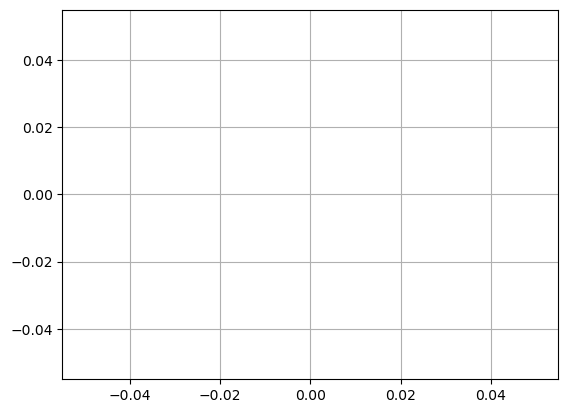

In [7]:
for colname in colsDiff:
    plt.scatter(np.arange(len(differences[colname])), differences[colname], s=2)
plt.grid()
plt.show()